<a href="https://colab.research.google.com/github/SithuminiNimthara/Research_Project/blob/main/shoreline_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

!pip install ultralytics --quiet

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
zip_path = "/content/drive/MyDrive/Research/shoreline_seg_dataset.zip"

!mkdir -p /content/datasets
!unzip -q "{zip_path}" -d /content/datasets

!find /content/datasets -maxdepth 3 -name "data.yaml" -print


/content/datasets/data.yaml


In [8]:
import os

# (A) data.yaml path from your Roboflow YOLOv8-seg export
data_yaml = "/content/datasets/data.yaml" # Corrected path

# (B) project name for runs folder
run_name = "shoreline_seg_v1"


if not os.path.exists(data_yaml):
    raise FileNotFoundError(f"❌ data.yaml not found: {data_yaml}")
print("✅ Found data.yaml:", data_yaml)

✅ Found data.yaml: /content/datasets/data.yaml


Train YOLOv8 Segmentation

In [9]:
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")   # nano seg (fast). Later you can try yolov8s-seg.pt

model.train(
    data=data_yaml,
    epochs=80,
    imgsz=640,
    batch=16,     # if GPU memory error → try 8 or 4
    name=run_name
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.243 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fa

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ef46235eff0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [10]:
run_dir = f"/content/runs/segment/{run_name}"
best_pt = run_dir + "/weights/best.pt"

if not os.path.exists(best_pt):
    raise FileNotFoundError(f"❌ best.pt not found: {best_pt}")

save_pt = "/content/drive/MyDrive/Research/shoreline_seg_best.pt"
!cp "{best_pt}" "{save_pt}"

print("✅ Best model saved to Drive:", save_pt)
print("Run dir:", run_dir)

✅ Best model saved to Drive: /content/drive/MyDrive/Research/shoreline_seg_best.pt
Run dir: /content/runs/segment/shoreline_seg_v1


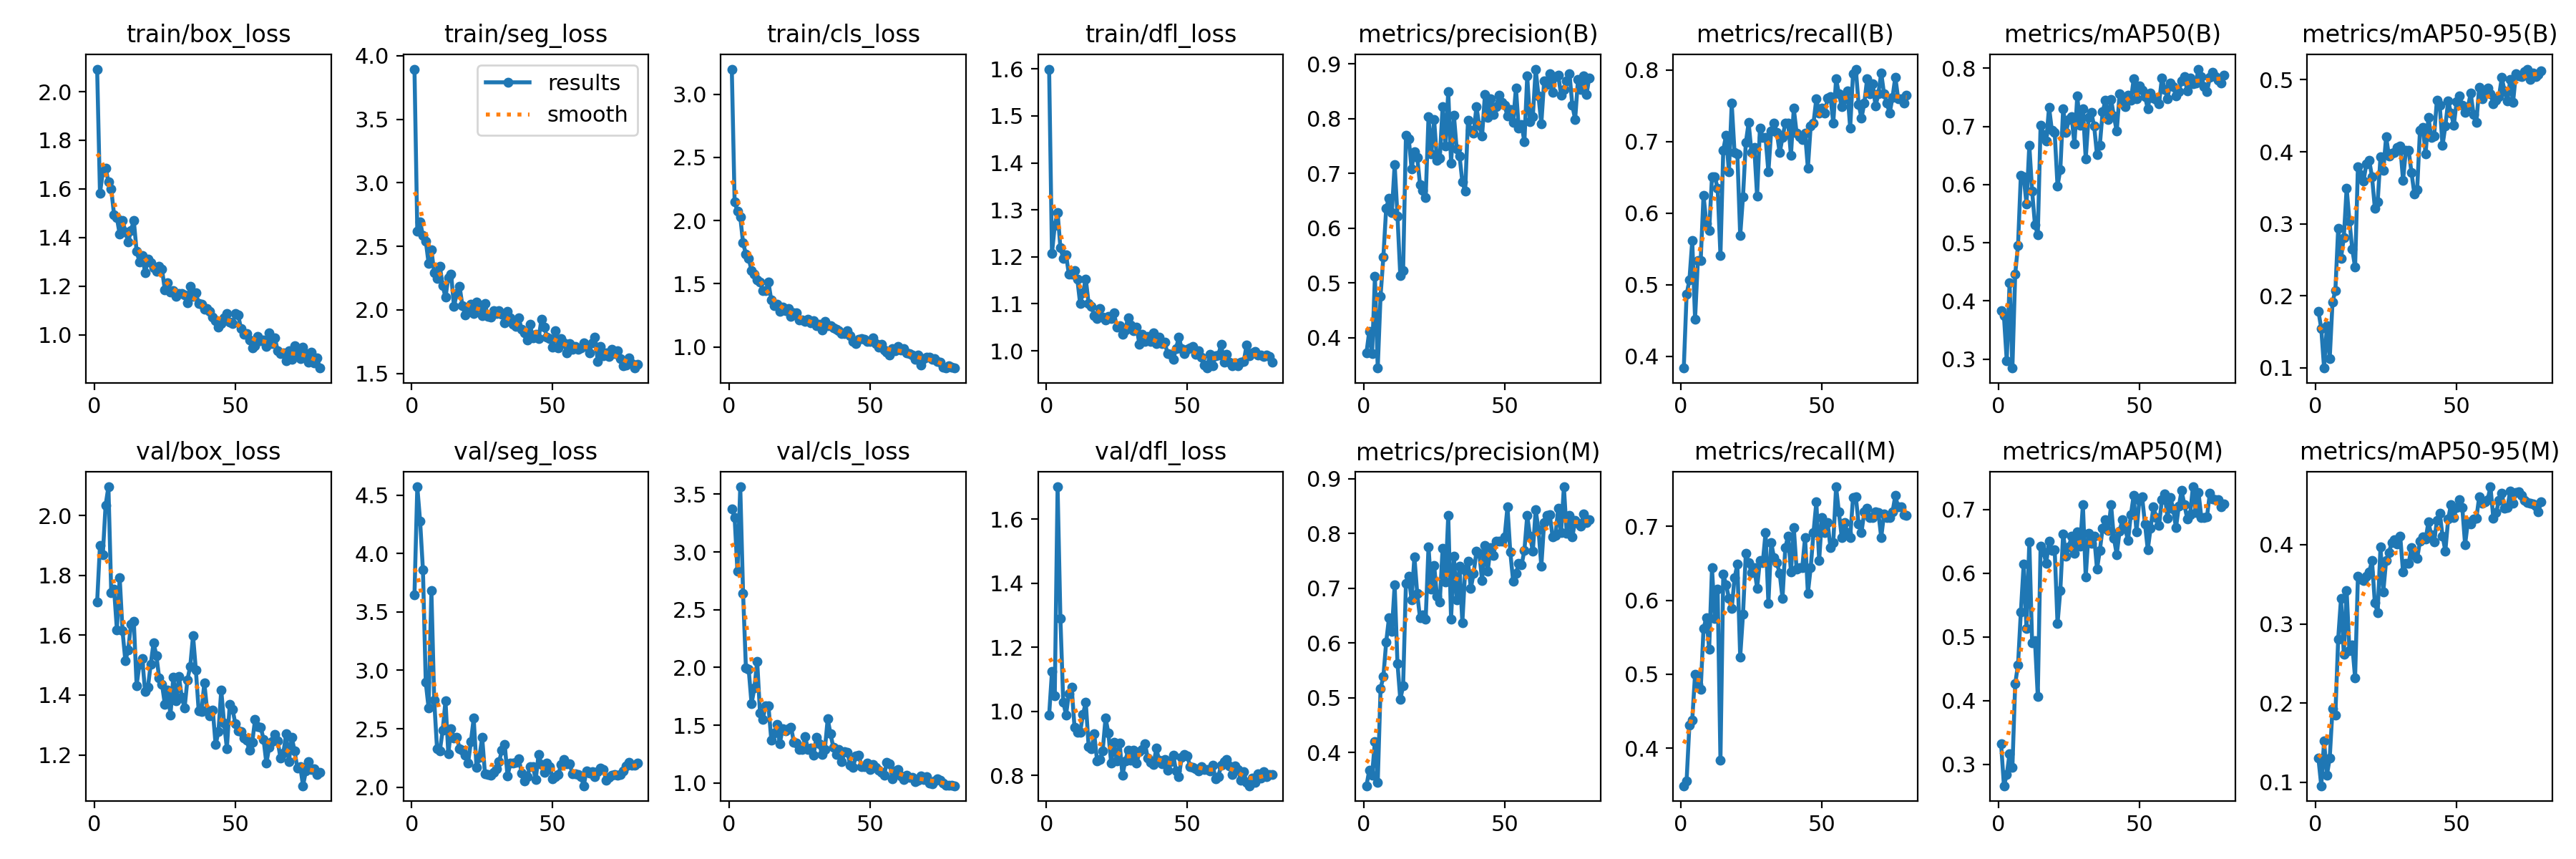

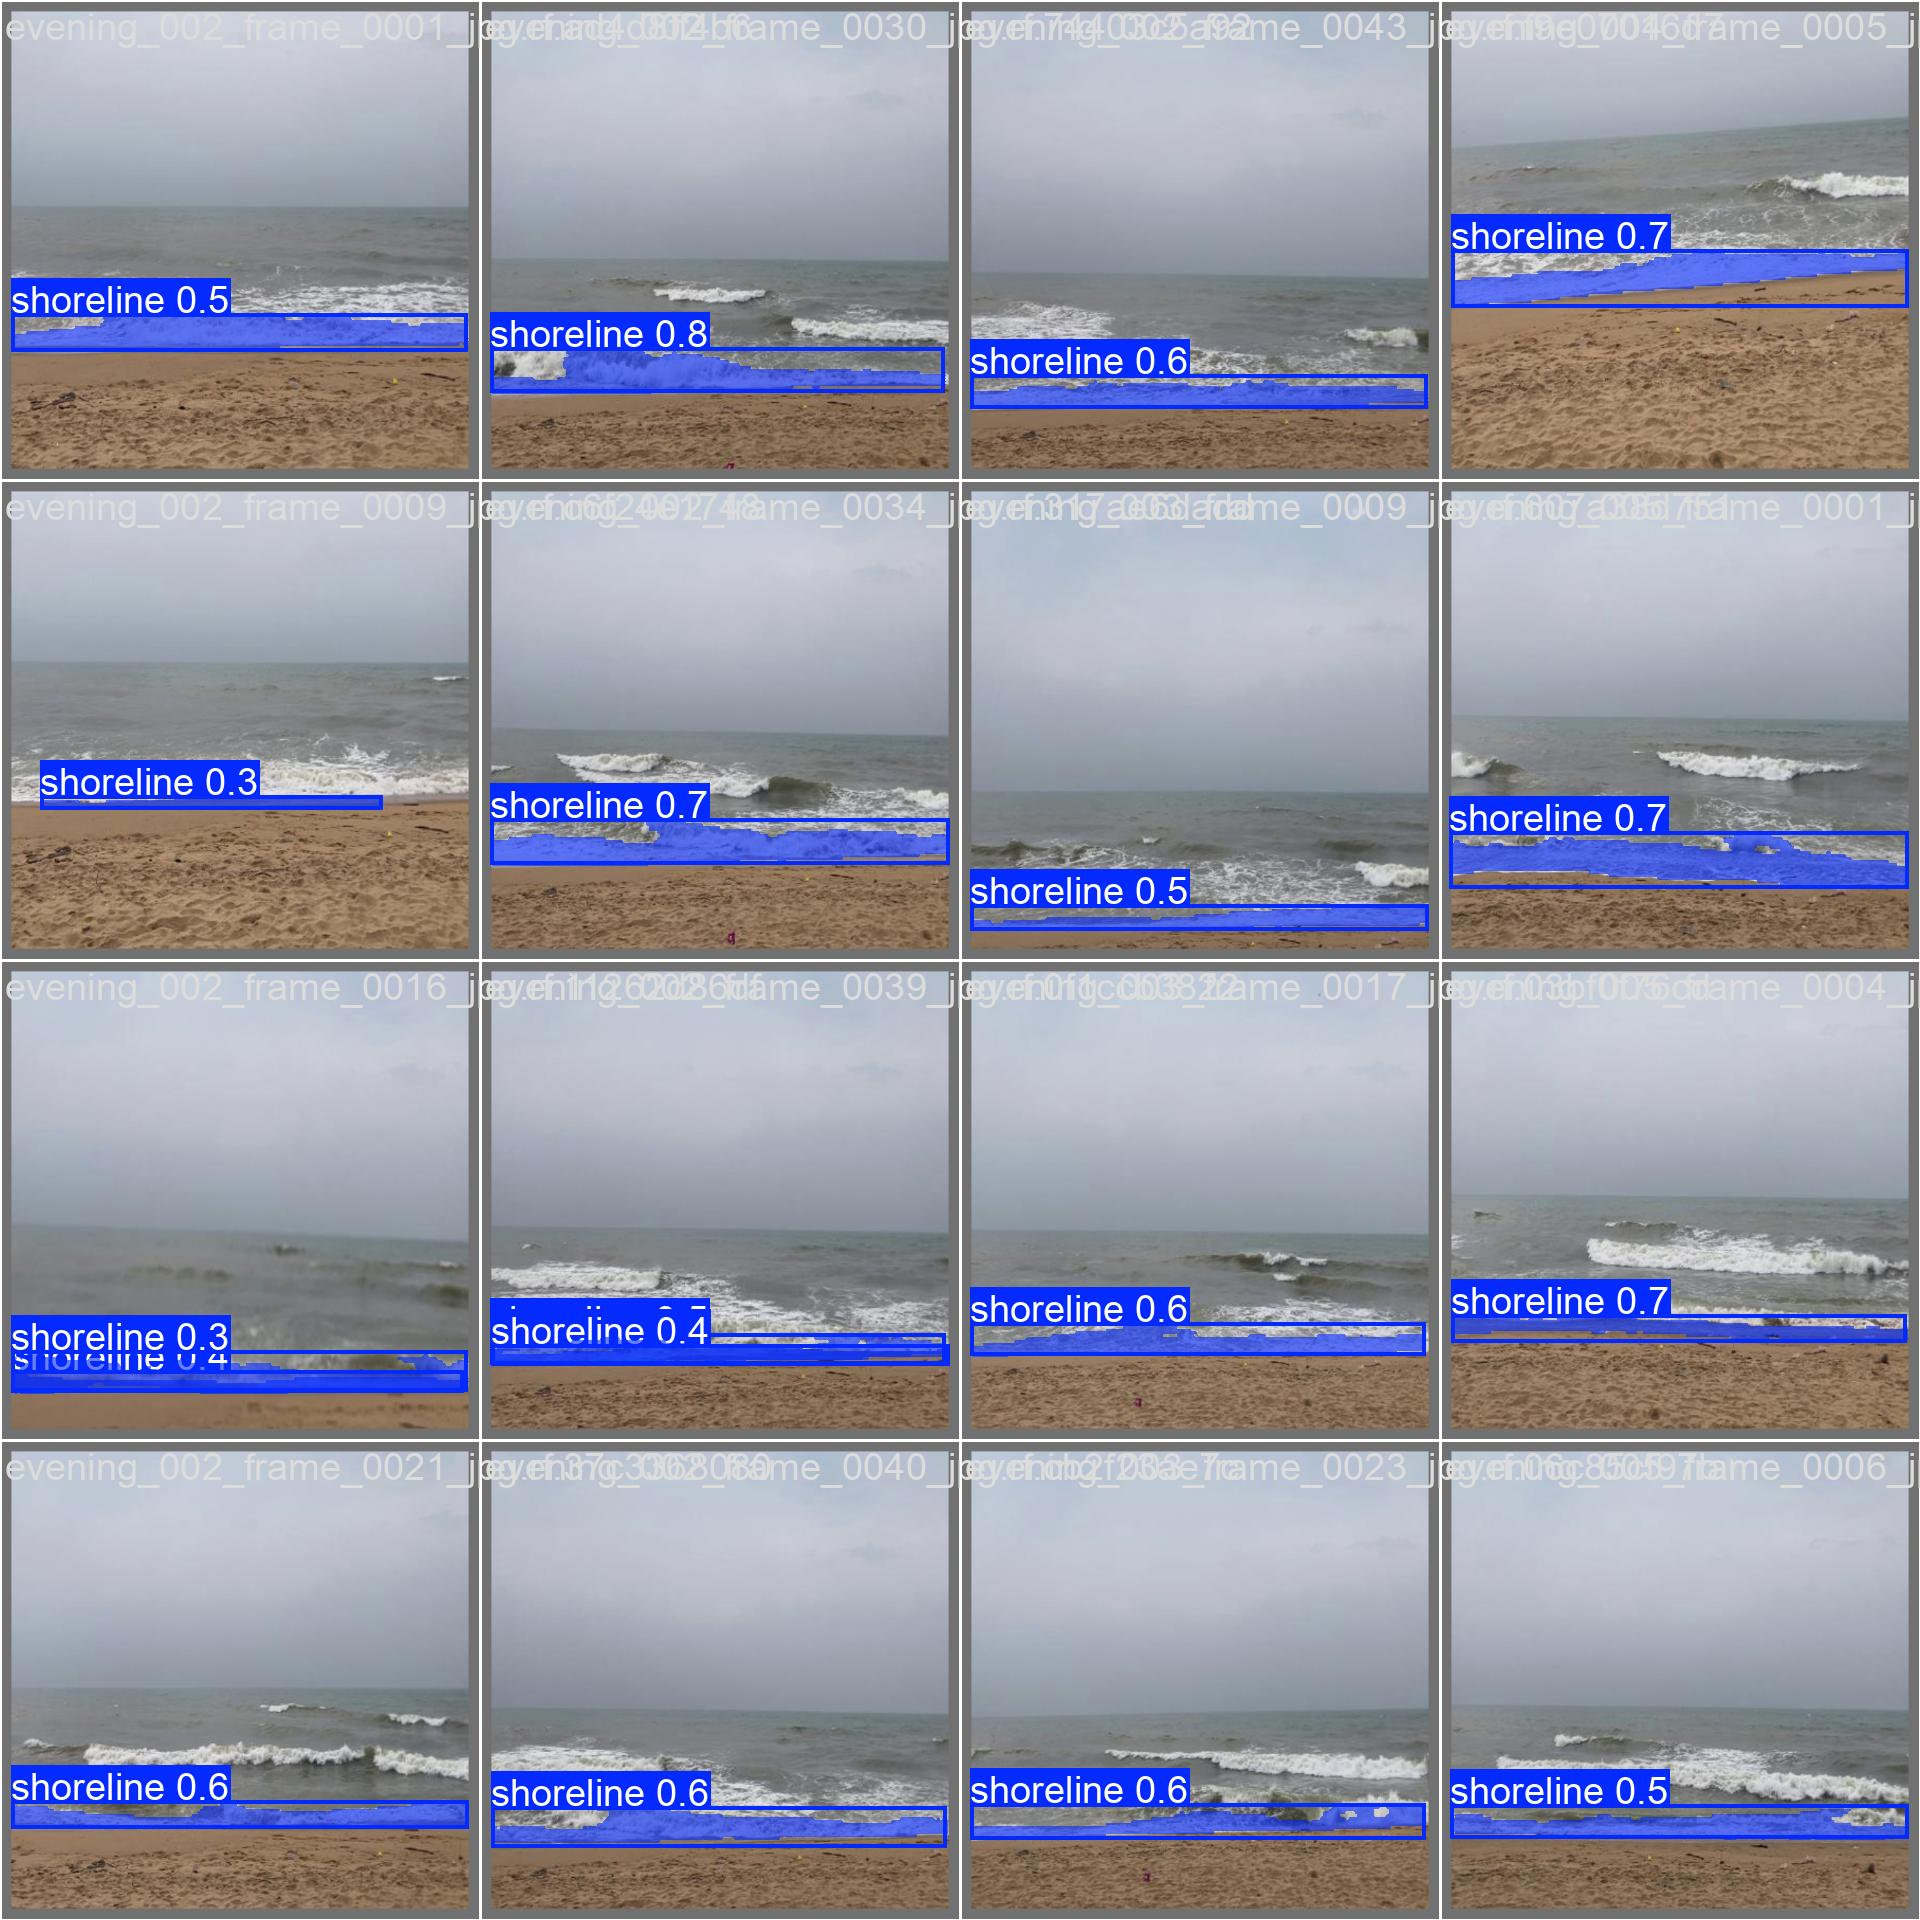

In [11]:
from IPython.display import Image, display

display(Image(run_dir + "/results.png"))          # training curves summary
display(Image(run_dir + "/val_batch0_pred.jpg"))  # validation predictions preview

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = run_dir + "/results.csv"
df = pd.read_csv(csv_path)

print("✅ Columns:", df.columns.tolist())
df.head()

✅ Columns: ['epoch', 'time', 'train/box_loss', 'train/seg_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)', 'val/box_loss', 'val/seg_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


,epoch,time,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),...,metrics/recall(M),metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,16.7385,2.09277,3.89538,3.19881,1.59956,0.37236,0.38356,0.38370,0.17856,...,0.34932,0.33186,0.13017,1.71179,3.64896,3.37587,0.98730,0.000540,0.000540,0.000540
1,2,29.4277,1.58218,2.61713,2.15045,1.20684,0.41226,0.48630,0.37434,0.15455,...,0.35616,0.26610,0.09567,1.89963,4.57125,3.29831,1.12311,0.001086,0.001086,0.001086
2,3,42.0626,1.66917,2.69125,2.07233,1.26688,0.37075,0.50685,0.29714,0.09968,...,0.43151,0.28342,0.15198,1.86777,4.27700,2.83158,1.04864,0.001619,0.001619,0.001619
3,4,54.3676,1.68611,2.58681,2.03040,1.29479,0.51169,0.56164,0.43150,0.15838,...,0.43836,0.31687,0.10888,2.03455,3.85987,3.56480,1.70076,0.001926,0.001926,0.001926
4,5,67.8039,1.62809,2.54259,1.82279,1.21919,0.34480,0.45205,0.28462,0.11296,...,0.50000,0.29478,0.13040,2.09559,2.89705,2.64174,1.28950,0.001901,0.001901,0.001901


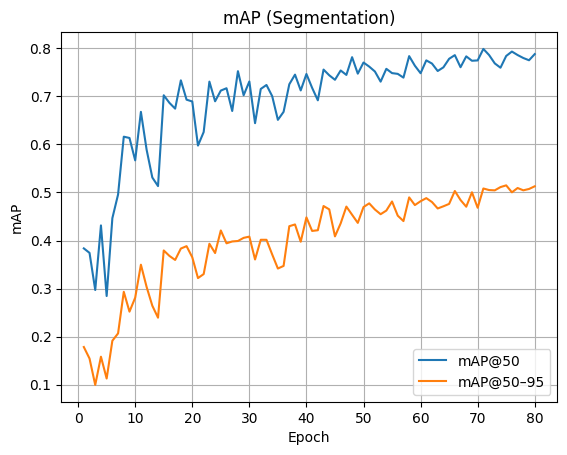

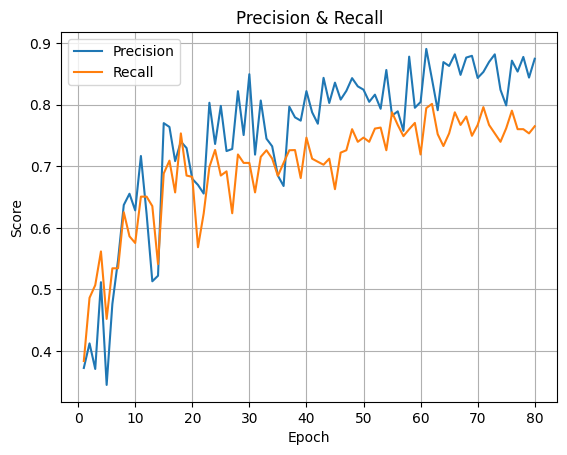

In [13]:
plt.figure()
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@50–95")
plt.xlabel("Epoch"); plt.ylabel("mAP"); plt.title("mAP (Segmentation)")
plt.legend(); plt.grid(); plt.show()

plt.figure()
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.xlabel("Epoch"); plt.ylabel("Score"); plt.title("Precision & Recall")
plt.legend(); plt.grid(); plt.show()

In [14]:
from ultralytics import YOLO
import cv2
import numpy as np
from matplotlib import pyplot as plt

model = YOLO(save_pt)
print("✅ Model loaded:", save_pt)

✅ Model loaded: /content/drive/MyDrive/Research/shoreline_seg_best.pt


In [15]:
test_img_path = "/content/drive/MyDrive/Research/test_frames/lowtide_004_frame_0000.jpg"
if not os.path.exists(test_img_path):
    raise FileNotFoundError(f"❌ Test image not found: {test_img_path}")

img = cv2.imread(test_img_path)
print("✅ Loaded test image:", test_img_path, img.shape)

✅ Loaded test image: /content/drive/MyDrive/Research/test_frames/lowtide_004_frame_0000.jpg (1080, 1920, 3)



0: 384x640 1 shoreline, 93.3ms
Speed: 3.7ms preprocess, 93.3ms inference, 21.5ms postprocess per image at shape (1, 3, 384, 640)


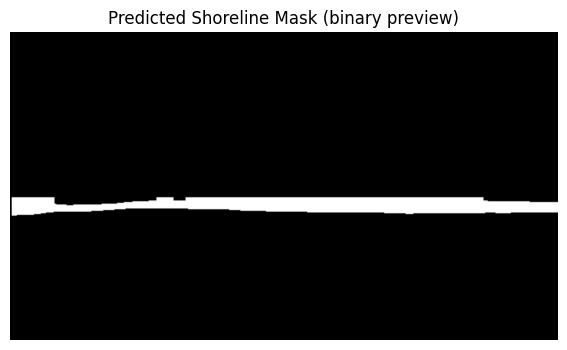

In [16]:
results = model(img)[0]

if results.masks is None:
    raise ValueError("❌ No masks predicted. Try another image or check dataset/labels.")

# Take first detected mask (if multiple detections exist)
mask = results.masks.data[0].cpu().numpy()   # float 0..1 (H,W)
mask_bin = (mask * 255).astype(np.uint8)

# Ensure same size as image (just in case)
mask_bin = cv2.resize(mask_bin, (img.shape[1], img.shape[0]))

# Preview mask
plt.figure(figsize=(10,4))
plt.imshow(mask_bin, cmap="gray")
plt.title("Predicted Shoreline Mask (binary preview)")
plt.axis("off")
plt.show()

In [17]:
# Hardcoded nest point (edit)
nest_x, nest_y = 900, 650    # <-- change based on where nest is in image
nest_pt = (nest_x, nest_y)

# Get all shoreline pixels
shore_pixels = cv2.findNonZero(mask_bin)
if shore_pixels is None:
    raise ValueError("❌ No shoreline pixels found in mask. Check predictions or threshold.")

shore_pixels = shore_pixels.reshape(-1, 2)

dx = shore_pixels[:, 0] - nest_x
dy = shore_pixels[:, 1] - nest_y
dists = np.sqrt(dx*dx + dy*dy)

min_idx = np.argmin(dists)
closest_pt = (int(shore_pixels[min_idx, 0]), int(shore_pixels[min_idx, 1]))
min_dist = float(dists[min_idx])

# Risk thresholds (pixels) - tune later
if min_dist > 80:
    risk = "SAFE"
elif min_dist >= 40:
    risk = "WARNING"
else:
    risk = "DANGER"

print("Nest:", nest_pt)
print("Closest shoreline pixel:", closest_pt)
print("Distance (px):", round(min_dist, 2))
print("Risk:", risk)

Nest: (900, 650)
Closest shoreline pixel: (900, 630)
Distance (px): 20.0
Risk: DANGER


✅ Saved risk overlay: /content/drive/MyDrive/Research/risk_overlay_seg.png


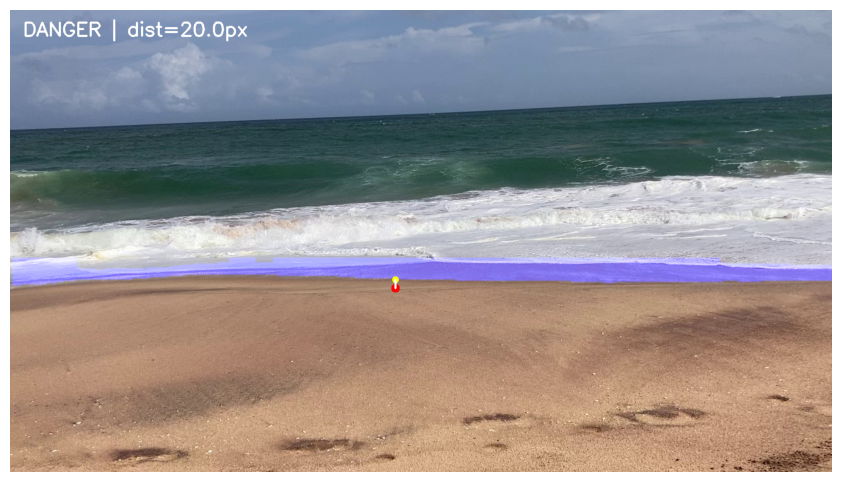

In [18]:
overlay = img.copy()

# Blue mask overlay
blue_mask = np.zeros_like(img)
blue_mask[:, :, 0] = mask_bin  # blue channel
overlay = cv2.addWeighted(overlay, 1.0, blue_mask, 0.5, 0)

# Nest point (red)
cv2.circle(overlay, nest_pt, 10, (0, 0, 255), -1)

# Closest shoreline pixel (yellow)
cv2.circle(overlay, closest_pt, 8, (0, 255, 255), -1)

# Distance line (white)
cv2.line(overlay, nest_pt, closest_pt, (255, 255, 255), 3)

# Label text
text = f"{risk} | dist={min_dist:.1f}px"
cv2.putText(overlay, text, (30, 60),
            cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 3)

# Save to Drive
out_path = "/content/drive/MyDrive/Research/risk_overlay_seg.png"
cv2.imwrite(out_path, overlay)
print("✅ Saved risk overlay:", out_path)

# Show
plt.figure(figsize=(14,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()